## **Análisis y recopilación de Noticias Falsas**

En este Notebook vamos a estar analizando y recopilando información noticias falsas en español. En primer lugar, se hara un estudio de distintos datasets encontrados en la nube.Luego vamos a analizar una gran variedad de datos obtenidos de paginas de fact-checking mediante la tecnica de web scrapping. Finalmente se busca unificar toda la informacion para contar con un corpus robusto de noticias falsas en español.

A modo de estandarizar la informacion, se cambiara las labels de la siguiente manera en caso de que corresponda:

* True : 1
* False : 0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## **1. Preparación de datasets preexistentes**

**Objetivos de la sección:**

*   Unificar nombres de columnas

*   Unificar las clasificaciones de *True* o *Fake* por 1 y 0 segun corresponda

*   Eliminar columnas sobrantes

### **Dataset de la universidad de Vigo**

Este conjunto de datos fue creado para un trabajo final de grado en la Universidad de Vigo. Su objetivo era el entrenamiento de un modelo Transformer para la detección de noticias falsas en el ámbito político en español.

La carpeta obtenida contaba con los siguientes archivos: 
 * D5500_test.csv
 * D11000_test.csv
 * D21000_train.csv
 * D46000_train.csv
 * D57000_complete.csv



Para mas informacion visitar el siguiente [enlace](https://www.kaggle.com/datasets/javieroterovizoso/spanish-political-fake-news/data).

In [6]:
vigo = pd.read_csv('data/Vigo/D57000_complete.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)
vigo.head()

,Categoria,Titulo,Texto,Fecha
ID,1,Moreno intenta apaciguar el flanco sanitario m...,El presidente abre la puerta a unos comicios e...,19/04/2022
ID,1,La Abogacía del Estado se retira como acusació...,"En un escrito, la abogada del Estado Rosa Marí...",17/09/2021
ID,0,Las promesas incumplidas de Pablo Echenique en...,Este lunes y martes la Asamblea de Madrid acog...,12/09/2022
ID,1,Sánchez defiende 'resolver el problema' de la ...,Resulta evidente que la ley ha tenido algunos ...,07/02/2023
ID,1,Ian Gibson cierra la lista electoral de la con...,"El hispanista, que ya ocupó un puesto simbólic...",12/04/2023


In [8]:
vigo.shape

(57231, 4)

In [22]:
vigo["Categoria"].value_counts()

Categoria
1    33351
0    23880
Name: count, dtype: int64

In [10]:
v1 = pd.read_csv('data/Vigo/D57000_complete.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)
v2 = pd.read_csv('data/Vigo/D11000_test.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)
v3 = pd.read_csv('data/Vigo/D21000_train.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)
v4 = pd.read_csv('data/Vigo/D46000_train.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)
v5 = pd.read_csv('data/Vigo/D5500_test.csv',sep=';',names=['Categoria', 'Titulo', 'Texto', 'Fecha'], header=0)


In [36]:
v_union = pd.concat([v1, v2,v3,v4,v5], ignore_index=True)
v_union.shape

(141139, 4)

In [43]:
v_sin_duplicados = v_union.drop_duplicates(subset=["Titulo"])
v_sin_duplicados.shape

(60555, 4)

In [48]:
vigo["Origen"] = "Vigo"

In [93]:
vigo.to_csv("data.csv", index=False)

### **Dataset de la Universidad de Madrid**


Este dataset fue realizado durante la elaboración del trabajo de fin de máster en ciberseguridad de la universidad politécnica de madrid con el fin de identificar fake news de real news.

La carpeta obtenida contaba con los siguientes archivos: 
 * spanishFakeNews.csv
 * testSpanishFakeNews.csv



Para mas informacion visitar el siguiente [enlace](https://www.kaggle.com/datasets/zulanac/fake-and-real-news).

In [94]:
madrid = pd.read_csv("data/Madrid/spanishFakeNews.csv",names=['Texto','Categoria'],header=0)
madrid.head()

,Texto,Categoria
0,El año pasado la Ciudad de México se estremeci...,fake
1,Manuela Carmena pide a los madrileños que guar...,fake
2,Una fuerte sorpresa se llevó el todavía presid...,fake
3,La 1 de Televisión Española repitió ayer como ...,fake
4,685 curas católicos fueron acusados de abuso s...,real


In [52]:
madrid.shape

(538, 2)

In [95]:
madrid['Categoria'] = madrid['Categoria'].replace({'real': 1 , 'fake': 0})
madrid['Categoria'].value_counts()

Categoria
1    305
0    233
Name: count, dtype: int64

In [96]:
madrid_test = pd.read_csv("data/Madrid/testSpanishFakeNews.csv",names=['Texto','Categoria'],header=0)
madrid_test['Categoria'] = madrid_test['Categoria'].replace({'real': 1 , 'fake': 0})

In [97]:
madrid_test['Categoria'].value_counts()

Categoria
1    34
0    26
Name: count, dtype: int64

In [98]:
m_union = pd.concat([madrid,madrid_test], ignore_index=True)
m_union

,Texto,Categoria
0,El año pasado la Ciudad de México se estremeci...,0
1,Manuela Carmena pide a los madrileños que guar...,0
2,Una fuerte sorpresa se llevó el todavía presid...,0
3,La 1 de Televisión Española repitió ayer como ...,0
4,685 curas católicos fueron acusados de abuso s...,1
...,...,...
593,Francia anunció la detención en Yibuti de Pete...,1
594,La UDA competirá en los Juegos Nacionales Inte...,1
595,El presidente estadounidense Donald Trump rech...,1
596,Mundo México deporta a 98 migrantes centroamer...,1


In [99]:
m_sin_duplicados = m_union.drop_duplicates()
m_sin_duplicados.shape

(598, 2)

In [100]:
m_sin_duplicados["Origen"] = "Madrid"
m_sin_duplicados

,Texto,Categoria,Origen
0,El año pasado la Ciudad de México se estremeci...,0,Madrid
1,Manuela Carmena pide a los madrileños que guar...,0,Madrid
2,Una fuerte sorpresa se llevó el todavía presid...,0,Madrid
3,La 1 de Televisión Española repitió ayer como ...,0,Madrid
4,685 curas católicos fueron acusados de abuso s...,1,Madrid
...,...,...,...
593,Francia anunció la detención en Yibuti de Pete...,1,Madrid
594,La UDA competirá en los Juegos Nacionales Inte...,1,Madrid
595,El presidente estadounidense Donald Trump rech...,1,Madrid
596,Mundo México deporta a 98 migrantes centroamer...,1,Madrid


In [78]:
def read_and_concat(ruta,data):
    df = pd.read_csv(ruta)
    df_actualizado = pd.concat([df, data], ignore_index=True)
    df_actualizado.to_csv(ruta, index=False)
    print(df_actualizado.shape)

In [101]:
read_and_concat("data.csv",m_sin_duplicados)

(57829, 5)


### **Dataset de Kaggle**

Este conjunto de datos fue encontrado en la plataforma Kaggle bajo el nombre *noticias falsas en español*, su autor es Arsenii Tretiakov.

La carpeta obtenida contaba con los siguientes archivos: 
 * fakes1000.csv
 * onlyfakes.csv
 * onlytrue.csv
 * train.csv
 * test.csv



Para mas informacion visitar el siguiente [enlace](https://www.kaggle.com/datasets/arseniitretiakov/noticias-falsas-en-espaol/data)

In [104]:
kaggle = pd.read_csv("data/Kaggle/fakes1000.csv")
kaggle

,class,Text
0,True,Algunas de las voces extremistas más conocida...
1,True,Después de casi dos años y medio de luchas po...
2,True,Dos periodistas birmanos de la agencia Reuter...
3,True,El Cuerpo Nacional de Policía ha detenido a c...
4,True,El desfile de la firma en Roma se convierte e...
...,...,...
1995,True,El Consejo de Gobierno ha dado su visto bueno...
1996,True,Investigadores valencianos han desarrollado u...
1997,True,Los arrestados actuaban en coches y en establ...
1998,True,El Rey ha encargado este miércoles a Pedro Sá...


In [115]:
kaggle["class"].value_counts()

class
True     1000
False    1000
Name: count, dtype: int64

In [126]:
k1 = pd.read_csv("data/Kaggle/fakes1000.csv",names=['Categoria','Texto'],header=0)

In [171]:
k2 = pd.read_csv("data/Kaggle/test.csv")
k2.head()

,title,text
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó..."
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci..."
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...


In [136]:
k3 = pd.read_csv("data/Kaggle/train.csv",names=['Titulo','Texto','Categoria'],header=0)
k3

,Titulo,Texto,Categoria
0,NaN,El suceso ha tenido lugar en Brasil. Un adole...,1
1,"""La quimioterapia mata a la gente y no al cánc...",Estamos en la semana decisiva. Los expertos a...,1
2,Los Cubos De Caldo Para Cocinar Son Veneno Par...,Estudios científicos hay muchos. Unos nos int...,1
3,MEGATERREMOTO EN LOS PRÓXIMOS DÍAS ALINEACIÓN ...,Ha sucedido en la ciudad de San José de Río P...,1
4,¡Qué injusticia! El perro que defendió su casa...,La fiesta en Sevilla por el vuelco electoral ...,1
...,...,...,...
1595,El 81% de las familias españolas prefieren los...,"Recuperamos la historia de Aleixandra, la jove...",0
1596,AEGC denuncia una frontera desprotegida por fa...,"Reproches, tensión y sinceridad: la comida en ...",0
1597,Huawei fía su supervivencia a la innovación,"RT @ElMundoOpinion: ""PSOE, PP, Ciudadanos y Vo...",0
1598,La Marina marroquí intercepta a 247 emigrantes...,Rusia cita al embajador español por unas decla...,0


In [137]:
k4 = pd.read_csv("data/Kaggle/onlyfakes1000.csv",names=['Texto'],header=0)
k4["Categoria"] = "False"
k5 = pd.read_csv("data/Kaggle/onlytrue1000.csv",names=['Texto'],header=0)
k5["Categoria"] = "True"

In [138]:
k_union = pd.concat([k1,k4,k5], ignore_index=True)
k_union

,Categoria,Texto
0,True,Algunas de las voces extremistas más conocida...
1,True,Después de casi dos años y medio de luchas po...
2,True,Dos periodistas birmanos de la agencia Reuter...
3,True,El Cuerpo Nacional de Policía ha detenido a c...
4,True,El desfile de la firma en Roma se convierte e...
...,...,...
3995,True,El Consejo de Gobierno ha dado su visto bueno...
3996,True,Investigadores valencianos han desarrollado u...
3997,True,Los arrestados actuaban en coches y en establ...
3998,True,El Rey ha encargado este miércoles a Pedro Sá...


In [141]:
k_sin_duplicados = k_union.drop_duplicates(subset=["Texto"])
k_sin_duplicados.shape

(1958, 2)

In [157]:
k1['Categoria'] = k1['Categoria'].replace({True: 1 , False: 0})
k1['Origen'] = "Kaggle"
k1

,Categoria,Texto,Origen
0,1,Algunas de las voces extremistas más conocida...,Kaggle
1,1,Después de casi dos años y medio de luchas po...,Kaggle
2,1,Dos periodistas birmanos de la agencia Reuter...,Kaggle
3,1,El Cuerpo Nacional de Policía ha detenido a c...,Kaggle
4,1,El desfile de la firma en Roma se convierte e...,Kaggle
...,...,...,...
1995,1,El Consejo de Gobierno ha dado su visto bueno...,Kaggle
1996,1,Investigadores valencianos han desarrollado u...,Kaggle
1997,1,Los arrestados actuaban en coches y en establ...,Kaggle
1998,1,El Rey ha encargado este miércoles a Pedro Sá...,Kaggle


In [158]:
k3['Origen'] = "Kaggle"
k3

,Titulo,Texto,Categoria,Origen
0,NaN,El suceso ha tenido lugar en Brasil. Un adole...,1,Kaggle
1,"""La quimioterapia mata a la gente y no al cánc...",Estamos en la semana decisiva. Los expertos a...,1,Kaggle
2,Los Cubos De Caldo Para Cocinar Son Veneno Par...,Estudios científicos hay muchos. Unos nos int...,1,Kaggle
3,MEGATERREMOTO EN LOS PRÓXIMOS DÍAS ALINEACIÓN ...,Ha sucedido en la ciudad de San José de Río P...,1,Kaggle
4,¡Qué injusticia! El perro que defendió su casa...,La fiesta en Sevilla por el vuelco electoral ...,1,Kaggle
...,...,...,...,...
1595,El 81% de las familias españolas prefieren los...,"Recuperamos la historia de Aleixandra, la jove...",0,Kaggle
1596,AEGC denuncia una frontera desprotegida por fa...,"Reproches, tensión y sinceridad: la comida en ...",0,Kaggle
1597,Huawei fía su supervivencia a la innovación,"RT @ElMundoOpinion: ""PSOE, PP, Ciudadanos y Vo...",0,Kaggle
1598,La Marina marroquí intercepta a 247 emigrantes...,Rusia cita al embajador español por unas decla...,0,Kaggle


In [160]:
kaggle_data = pd.concat([k1,k3], ignore_index=True)
read_and_concat("data.csv",kaggle_data)


(61429, 5)


In [161]:
kaggle_data["Categoria"].value_counts()

Categoria
1    1800
0    1800
Name: count, dtype: int64

### **Dataset encontrado en Github [*Spanish Fake News Corpus*]** 


El Spanish Fake News Corpus contiene pares de publicaciones falsas y verdaderas sobre diferentes eventos (todas escritas en español) que fueron recopiladas desde noviembre de 2020 hasta marzo de 2021. Para recopilar la información se utilizaron diferentes fuentes de la web, pero principalmente de dos tipos: 

1) Sitios web de periódicos y empresas de medios

2) Sitios web de verificación de datos. La mayoría de los sitios de verificación de datos revisados ​​utilizados siguen las recomendaciones de la Red Internacional de Verificación de Datos (IFCN) que busca promover buenas prácticas en la verificación de datos.v.

La carpeta obtenida contaba con los siguientes archivos: 
 * development.csv
 * train.csv
 * test.csv



Para mas informacion visitar el siguiente [enlace](https://github.com/jpposadas/FakeNewsCorpusSpanish) al repositorio.


In [175]:
p1 = pd.read_excel("data/Posadas/development.xlsx",names=['id','Categoria','Topico','Fuente','Titulo','Texto','URL'],header=0)
print(p1.shape)
p1.head()

(295, 7)


,id,Categoria,Topico,Fuente,Titulo,Texto,URL
0,1,Fake,Education,El Ruinaversal,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http://www.elruinaversal.com/2017/06/04/maestr...
1,2,True,Education,Heraldo,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https://www.heraldo.es/noticias/sociedad/2017/...
2,3,True,Education,abc,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https://www.abc.es/cultura/abci-estudia-inclui...
3,4,True,Education,El país,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https://elpais.com/internacional/2017/08/17/ac...
4,5,Fake,Education,El Ruinaversal,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http://www.elruinaversal.com/2017/06/25/nombra...


In [176]:
p1['Categoria'] = p1['Categoria'].replace({"True": 1 , "Fake": 0})
p1['Categoria'].value_counts()

Categoria
1    153
0    142
Name: count, dtype: int64

In [173]:
p2 = pd.read_excel("data/Posadas/test.xlsx",names=['id','Categoria','Topico','Fuente','Titulo','Texto','URL'],header=0)
print(p2.shape)
p2.head()

(572, 7)


,id,Categoria,Topico,Fuente,Titulo,Texto,URL
0,1,True,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,False,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,True,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...
3,4,False,Política,AFPFactual,NaN,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB
4,5,True,Sociedad,La Republica,El censo poblacional 2018 tendrá un costo de $...,La primera fase del censo será virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...


In [177]:
p2['Categoria'] = p2['Categoria'].replace({True: 1 , False: 0})
p2['Categoria'].value_counts()

Categoria
1    286
0    286
Name: count, dtype: int64

In [174]:
p3 = pd.read_excel("data/Posadas/train.xlsx",names=['id','Categoria','Topico','Fuente','Titulo','Texto','URL'],header=0)
print(p3.shape)
p3.head()


(676, 7)


,id,Categoria,Topico,Fuente,Titulo,Texto,URL
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,True,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...


In [178]:
p3['Categoria'] = p3['Categoria'].replace({"True": 1 , "Fake": 0})
p3['Categoria'].value_counts()

Categoria
0    338
1    338
Name: count, dtype: int64

In [181]:
p_union =pd.concat([p1,p2,p3], ignore_index=True)
p_union.shape

(1543, 7)

In [185]:
p_sin_duplicados = p_union.drop_duplicates(subset=["Titulo","Texto"])
p_sin_duplicados.shape

(1542, 7)

In [195]:
p_union["Origen"] = "Posadas"
p_union["Categoria"].value_counts()

Categoria
1    777
0    766
Name: count, dtype: int64

In [196]:
read_and_concat("data.csv",p_union)

(62972, 9)


## **2. Analisis de Datos de fuentes**

**Objetivos de la sección:**

*   Estudiar el formato de los datos de las distintas fuentes

*   Clasificar los datos en caso de ser necesario

*   Unificar las clasificaciones por una escala entre 1 y 0 segun corresponda

*   Unificar el nombre de las columnas y eliminar las sobrantes

### **Dataset encontrado en Github [*FakeStorage*]**

Este proyecto está dirigido a la construcción de un dataset de noticias falsas (o "fake news") en internet que estén en español. Con este dataset buscamos contribuir a la construcción de sistemas para identificar noticias falsas en internet. El dataset sigue en construcción.

La carpeta obtenida contaba con los siguientes archivos: 
 * fakenewsMaldita.json
 * fakenewsNewtral.json
 * fakenewsNewtral_old.json



Para mas informacion visitar el siguiente [enlace](https://github.com/alcorpas10/FakesStorage) al repositorio.



In [2]:
maldita = pd.read_json("data/FakeStorage/fakenewsMaldita.json").transpose()
maldita

,titulo,link,date,words_count
0,"No, los datos de positivos de un estudio de la...",https://maldita.es/malditobulo/20211220/complu...,2021/12/20,"{'no': 13, 'los': 15, 'datos': 8, 'de': 76, 'p..."
1,La imagen de la cafeteria del Congreso de los ...,https://maldita.es/malditobulo/20211220/cafete...,2021/12/20,"{'la': 32, 'imagen': 5, 'de': 31, 'cafeteria':..."
2,Como los antivacunas han utilizado el problema...,https://maldita.es/malditobulo/20211220/kun-ag...,2021/12/20,"{'como': 6, 'los': 9, 'antivacunas': 1, 'han':..."
3,"No, Mexico no permite modificar el acta de nac...",https://maldita.es/malditobulo/20211220/mexico...,2021/12/20,"{'no': 7, 'mexico': 8, 'permite': 3, 'modifica..."
4,"No, esta ilustracion del artista Walter Molino...",https://maldita.es/malditobulo/20211220/pintur...,2021/12/20,"{'no': 5, 'esta': 1, 'ilustracion': 6, 'del': ..."
...,...,...,...,...
5646,"No, Donald Trump no plagio frases de su discur...",https://maldita.es/malditobulo/20170121/no-don...,2017/01/21,"{'no': 2, 'donald': 1, 'trump': 1, 'plagio': 1..."
5647,"No, Roberto Centeno no es asesor de Trump",https://maldita.es/malditobulo/20170120/no-rob...,2017/01/20,"{'no': 2, 'roberto': 1, 'centeno': 1, 'es': 1,..."
5648,"No, una mujer no se ha puesto veneno en la vag...",https://maldita.es/malditobulo/20170120/no-una...,2017/01/20,"{'no': 3, 'una': 3, 'mujer': 2, 'se': 2, 'ha':..."
5649,"No, un refugiado no ha violado y dejado embara...",https://maldita.es/malditobulo/20170114/no-un-...,2017/01/14,"{'no': 5, 'un': 3, 'refugiado': 4, 'ha': 1, 'v..."


In [5]:
newtral = pd.read_json("data/FakeStorage/fakenewsNewtral.json").transpose()
newtral

,titulo,link,date,words_count
0,Las vacunas contienen óxido de grafeno. Estas ...,https://www.newtral.es/carta-carlos-martinez-v...,20/12/2021,"{'las': 29, 'vacunas': 20, 'contienen': 3, 'ox..."
1,Este cuadro de una joven amamantando a un anci...,https://www.newtral.es/jules-lefebvre-cuadro-v...,20/12/2021,"{'este': 6, 'cuadro': 6, 'de': 60, 'una': 16, ..."
2,Las personas que han estado en la discoteca TA...,https://www.newtral.es/brote-discoteca-tenerif...,17/12/2021,"{'las': 14, 'personas': 3, 'que': 46, 'han': 7..."
3,Ursula Van Der Leyen (sic) dijo a la prensa qu...,https://www.newtral.es/von-der-leyen-codigo-nu...,17/12/2021,"{'ursula': 6, 'van': 1, 'der': 11, 'leyen': 11..."
4,Secuestran [en Australia] para inocular a la h...,https://www.newtral.es/nina-obligada-a-vacunar...,17/12/2021,"{'secuestran': 2, 'en': 46, 'australia': 21, '..."
...,...,...,...,...
1635,Picasso pintó el Guernica en recuerdo de un to...,https://www.newtral.es/fake-no-picasso-no-pint...,25/10/2018,"{'picasso': 9, 'pinto': 1, 'el': 22, 'guernica..."
1636,Un supuesto juez del Tribunal Constitucional c...,https://www.newtral.es/no-hay-jueces-cantando-...,19/10/2018,"{'un': 3, 'supuesto': 2, 'juez': 3, 'del': 4, ..."
1637,Este vídeo es un asalto de refugiados en España,https://www.newtral.es/desmentimos-un-nuevo-bu...,18/10/2018,"{'este': 2, 'video': 4, 'es': 4, 'un': 2, 'asa..."
1638,Haré todo lo posible para impedir que el Salar...,https://www.newtral.es/la-verdad-sobre-las-dec...,16/10/2018,"{'hare': 2, 'todo': 2, 'lo': 3, 'posible': 3, ..."


In [3]:
newtral_old = pd.read_json("data/FakeStorage/fakenewsNewtral_old.json").transpose()
newtral_old.shape

(1633, 4)

In [6]:
newtral_union = pd.concat([newtral,newtral_old],ignore_index=True)
newtral_sin_duplicados = newtral_union.drop_duplicates(subset=["titulo"])
newtral_sin_duplicados.shape

(1640, 4)

### **Datos recolectados mediante Web Scrapping**


Todos los datos mostrados a continuacion fueron recolectados por nuestro grupo desde el dia 01/10/2024 hasta el 01/12/2024, a traves de distintas paginas de fact-cheking utilizando el scrapeo de datos.

Los datos fueron recolectados de las siguientes fuentes: 

* [Chequeado](https://chequeado.com/notas/)
* [Newtral](https://www.newtral.es/)


In [13]:

chequeado = pd.read_csv("data/Scrape/chequeado.csv",names=['Titulo','Categoria','Texto'],header=0)
print(chequeado.shape)
chequeado.head()


(3638, 3)


,Titulo,Categoria,Texto
0,Son falsos estos resultados de boca de urna ad...,Falso,Circulan en redes sociales resultados presiden...
1,No se divulgaron resultados oficiales previos ...,Falso,Se difundieron en redes sociales supuestos pri...
2,"En el balotaje 2023, las boletas con el número...",Falso,"Miles de usuarios denuncian que, durante la jo..."
3,Sergio Massa no pronunció la frase “voy a pode...,Falso,Decenas de miles de usuarios comparten una pla...
4,"No, este mural de Lionel Messi no lleva escrit...",Falso,"A pocos días del balotaje, miles de usuarios d..."


In [14]:
chequeado["Categoria"].value_counts()

Categoria
Falso                     1572
Verdadero                  830
Engañoso                   374
Verdadero, pero…           263
Exagerado                  213
Insostenible               125
Discutible                  94
Apresurado                  40
En proceso, demorada        30
Incumplida                  29
En proceso, adelantada      19
Fuera de contexto           17
Cumplida                    13
Inchequeable                10
Incumplida con avances       9
Name: count, dtype: int64

In [15]:
chequeado["Origen"] = "Chequeado"

In [16]:
newtral_rmx = pd.read_csv("data/Scrape/newtral.csv",names=['Texto','Autor','Posicion','Categoria'],header=0)
newtral_rmx

,Texto,Autor,Posicion,Categoria
0,“Hay una resolución del Congreso de los Diputa...,Esteban González Pons,Vicesecretario general del PP,Verdad a medias
1,"""Nuestra deuda con el Estado es treinta veces ...",Alfonso Rueda,Presidente de la Xunta de Galicia,Verdadero
2,“Desde el año 2020 le arrebatamos el liderazgo...,Juan Manuel Moreno,Presidente de Andalucía,Verdad a medias
3,“[Impuesto temporal de grandes fortunas y soli...,Isabel Díaz Ayuso,Presidenta de la Comunidad de Madrid,Falso
4,“En esta Cámara yo traje una propuesta de Gobi...,Alberto Núñez Feijóo,Presidente del PP,Verdad a medias
...,...,...,...,...
1055,“Si al PSOE le dan los números para gobernar c...,Pablo Iglesias Turrión,Diputado,Falso
1056,"En Andalucía, de 47 millones dedicados a viole...",Rocío Monasterio San Martín,Diputada,Engañoso
1057,“El PP ha reducido la brecha salarial un 5%”,Pablo Casado Blanco,Diputado,Falso
1058,“Los partidos que llevaban en sus programas la...,Pedro Sánchez Pérez-Castejón,Presidente,Verdad a medias


In [17]:
newtral_rmx["Categoria"].value_counts()

Categoria
Falso              464
Engañoso           442
Verdad a medias    141
Verdadero           13
Name: count, dtype: int64

##  **3. Analisis Dataset final**


**Cantidad de valores totales:**

In [197]:
data = pd.read_csv("data.csv")
data.shape

(62972, 9)

**Cantidad de nulos por columna:**

In [216]:
data.isnull().sum()

Categoria        0
Titulo        3168
Texto            0
Fecha         5741
Origen           0
id           61429
Topico       61429
Fuente       61436
URL          61432
dtype: int64

**Cantidad de noticias Falsas y Verdaderas:**

In [221]:
tf_count = data["Categoria"].value_counts()
tf_count

Categoria
1    36267
0    26705
Name: count, dtype: int64

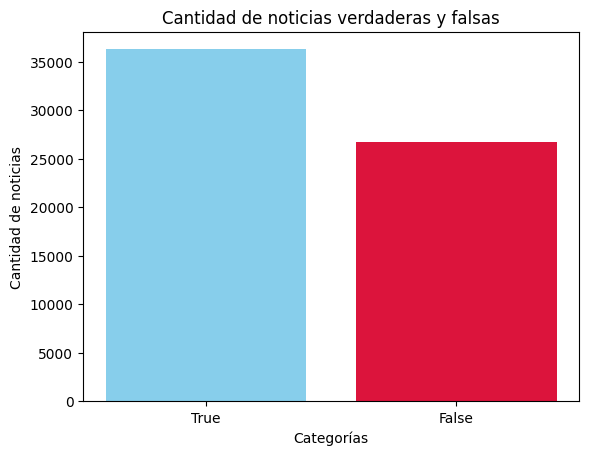

In [230]:
plt.bar("True", tf_count[1], color="skyblue", label='Barra Izquierda')
plt.bar("False", tf_count[0], color="crimson", label='Barra Derecha')
plt.title("Cantidad de noticias verdaderas y falsas")
plt.xlabel("Categorías")
plt.ylabel("Cantidad de noticias")
plt.show()

**Cantidad de noticias por tópico**

In [241]:
count_per_topic = data.groupby(data['Topico']).size().reset_index(name="Count").sort_values(by='Count')
count_per_topic

,Topico,Count
3,Deporte,2
0,Ambiental,4
1,Ciencia,13
8,Internacional,14
5,Education,22
12,Security,42
4,Economy,43
7,Health,46
11,Science,89
10,Política,107


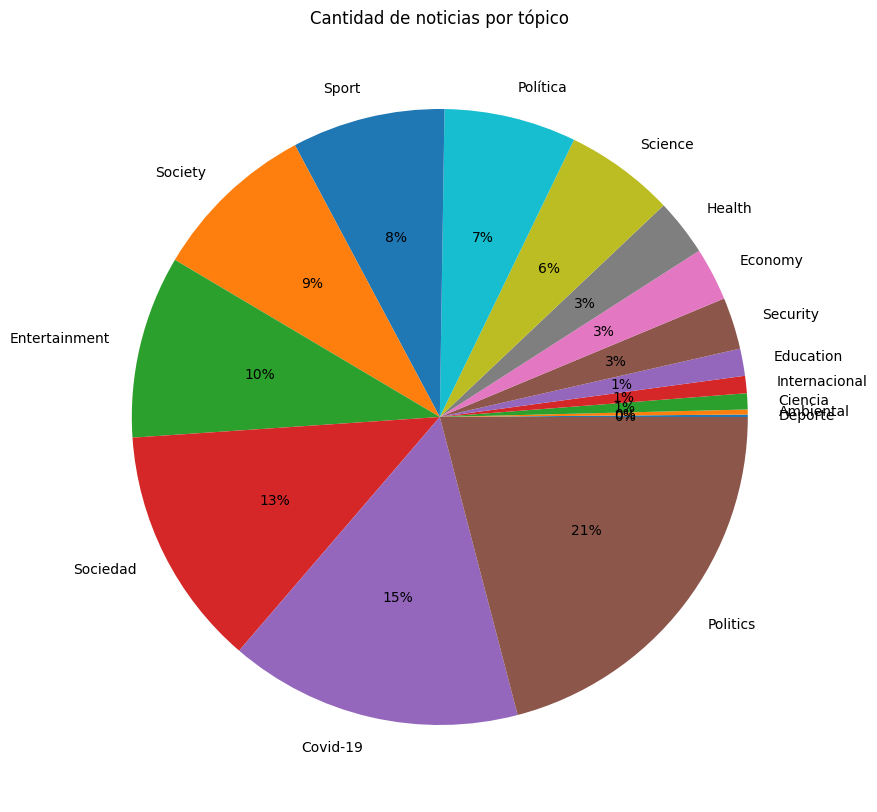

In [248]:
plt.figure(figsize=(15,10))
plt.pie(count_per_topic["Count"], labels=count_per_topic["Topico"],autopct="%1.f%%")

plt.title("Cantidad de noticias por tópico")

plt.show()

**Cantidad de noticias por fuente**

In [252]:
count_per_source = data.groupby(data['Fuente']).size().reset_index(name="Count").sort_values(by='Count',ascending=False)
count_per_source

,Fuente,Count
90,El Dizque,143
109,El Ruinaversal,94
9,AFPFactual,90
114,El Universal,69
126,El país,68
...,...,...
188,La Tercera,1
57,Cuba debate,1
56,Crónica sur,1
191,La comarca de Puerto Llano,1


In [259]:
count_per_source.head(10)

,Fuente,Count
90,El Dizque,143
109,El Ruinaversal,94
9,AFPFactual,90
114,El Universal,69
126,El país,68
133,Excelsior,52
223,Milenio,45
155,Hay noticia,39
142,Forbes,38
44,Censura 0,36


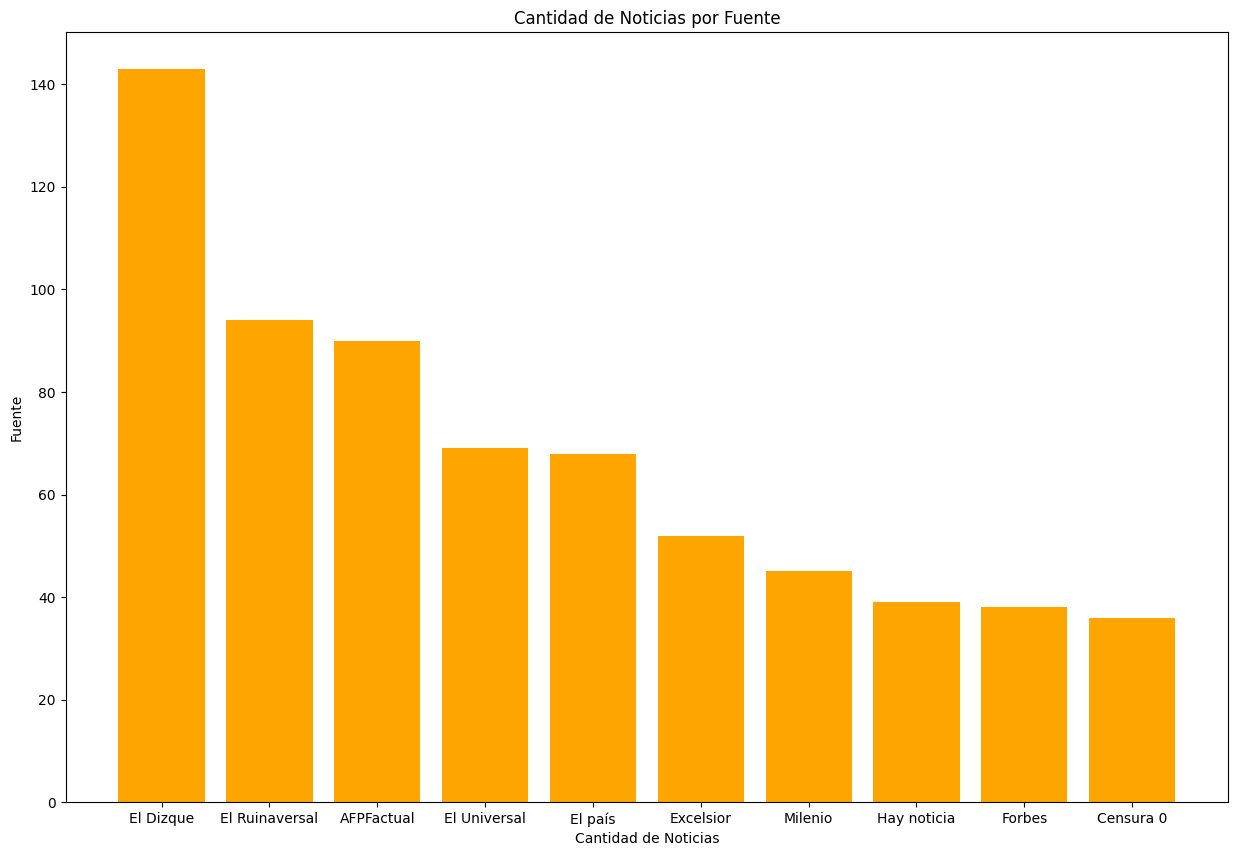

In [268]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño según sea necesario
plt.bar(count_per_source.head(10)['Fuente'], count_per_source.head(10)['Count'], color='orange')

plt.xlabel('Cantidad de Noticias')
plt.ylabel('Fuente')
plt.title('Cantidad de Noticias por Fuente')

plt.show()

**Cantidad de noticias y su categoria por año**

In [271]:
data['Fecha'] = pd.to_datetime(data['Fecha'],dayfirst=True)

# Obtener la fecha más antigua y la fecha más reciente
fecha_mas_antigua = data['Fecha'].min()
fecha_mas_reciente = data['Fecha'].max()

[fecha_mas_antigua, fecha_mas_reciente]

[Timestamp('2017-04-24 00:00:00'), Timestamp('2023-12-28 00:00:00')]

<Figure size 1200x600 with 0 Axes>

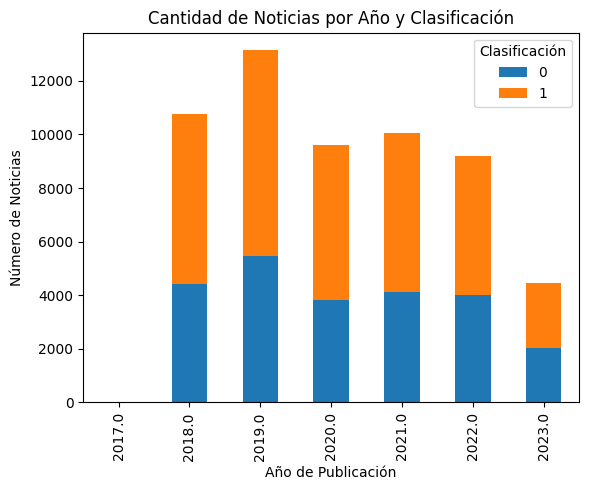

In [272]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Obtener el año de cada noticia
data['Year'] = data['Fecha'].dt.year

# Graficar la cantidad de noticias por año y clasificación
plt.figure(figsize=(12, 6))
data.groupby(['Year', 'Categoria']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Cantidad de Noticias por Año y Clasificación')
plt.xlabel('Año de Publicación')
plt.ylabel('Número de Noticias')
plt.legend(title='Clasificación')
plt.show()